### Импорт базовых библиотек

In [116]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### Чтение исходных данных:

In [117]:
DATA_PATH = r"data/data_v1-02.csv"
raw_df = pd.read_csv(DATA_PATH)

In [151]:
raw_df.shape[0]

300

In [118]:
raw_df.head()

,x,y
0,2.28750,-0.42185
1,0.76879,4.46150
2,-0.73421,4.39510
3,-2.12020,2.14640
4,-2.01430,-2.25580


In [119]:
X = raw_df['x'].to_numpy()
y = raw_df['y'].to_numpy()

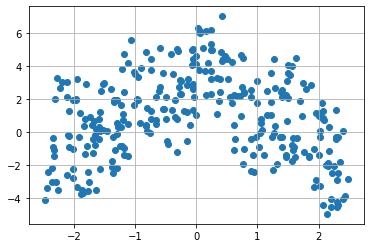

In [152]:
plt.scatter(X, y)
plt.grid()
plt.show()

### Задания

#### Построить зависимость средней (по фолдам) среднеквадратичной ошибки (MSE) 10 fold кросс-валидации на обучающей и тестовой выборках от параметра m (числа регрессоров в регрессионной модели)

In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [122]:
m = 2

poly = PolynomialFeatures(degree=m, include_bias=False)
model = LinearRegression()

new_X = poly.fit_transform(X.reshape(-1, 1))

In [123]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, new_X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
scores = [-item for item in scores]

In [124]:
np.mean(scores)

4.215684403714702

In [125]:
def MSE_10fold(m: int, X: np.array, y: np.array)->float:
    poly = PolynomialFeatures(degree=m, include_bias=False)
    model = LinearRegression()
    new_X = poly.fit_transform(X.reshape(-1, 1))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, new_X, y, scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    scores = [-item for item in scores]
    return np.log(np.mean(scores))

In [126]:
m_10fold_list = np.arange(1, 40)
loss_10fold_list = []

for m in m_10fold_list:
    loss_10fold_list.append(MSE_10fold(m, X, y))

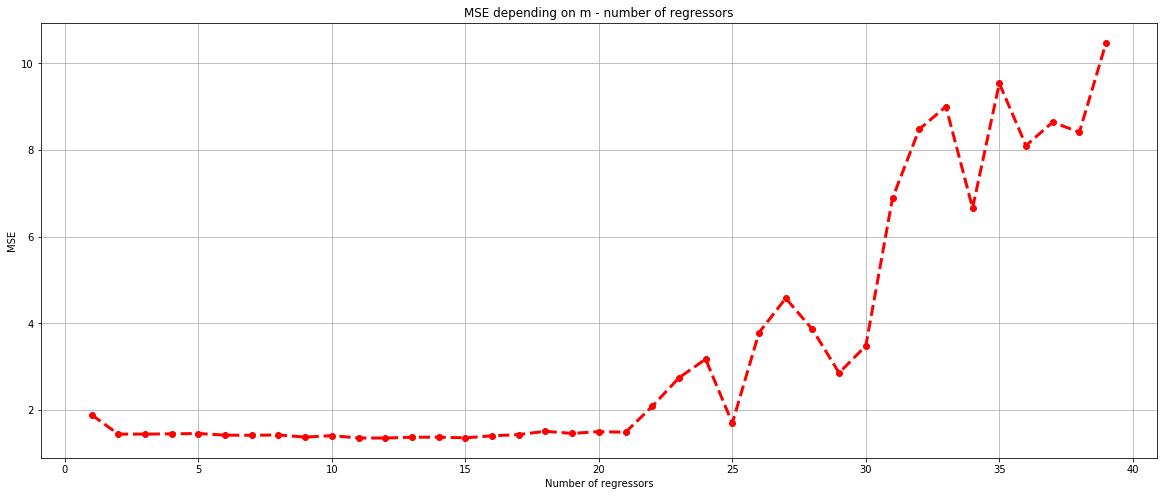

In [127]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('MSE depending on m - number of regressors')
plt.xlabel('Number of regressors')
plt.ylabel('MSE')
ax.plot(m_10fold_list, loss_10fold_list, 'ro--', linewidth=3)
ax.grid()
plt.show()

#### Построить зависимость средней (по фолдам) среднеквадратичной ошибки (MSE) LOO кросс-валидации на обучающей и тестовой выборках от параметра m

In [128]:
from sklearn.model_selection import LeaveOneOut

In [129]:
def MSE_loo(m: int, X:np.array, y:np.array)->float:
    poly = PolynomialFeatures(degree=m, include_bias=False)
    model = LinearRegression()
    new_X = poly.fit_transform(X.reshape(-1, 1))
    cv = LeaveOneOut()
    scores = cross_val_score(model, new_X, y, scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    scores = [-item for item in scores]
    return np.log(np.mean(scores))

In [130]:
m_loo_list = np.arange(1, 40)
loss_loo_list = []

for m in m_loo_list:
    loss_loo_list.append(MSE_loo(m, X, y))

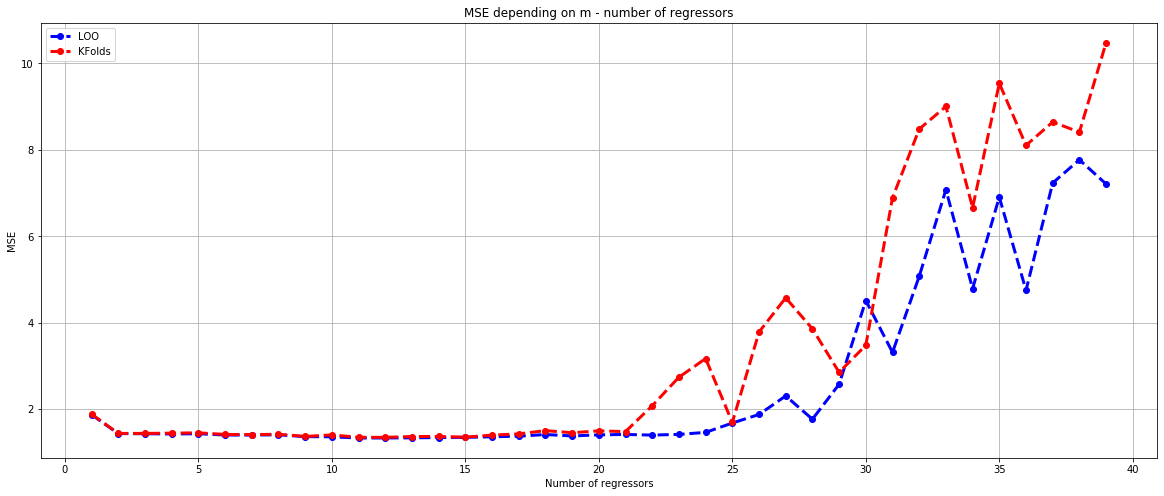

In [131]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title('MSE depending on m - number of regressors')
plt.xlabel('Number of regressors')
plt.ylabel('MSE')
ax.plot(m_loo_list, loss_loo_list, 'bo--', linewidth=3, label='LOO')
ax.plot(m_10fold_list, loss_10fold_list, 'ro--', linewidth=3, label='KFolds')
ax.legend()
ax.grid()
plt.show()

#### Построить гистограммы распределений среднеквадратичной ошибки (MSE) модели на обучающей и тестовой выборках, получаемых в результате кросс-валидации по методу Монте-Карло, привести статистические характеристики ошибок (среднее, дисперсия, с.к.о., доверительные интервалы), для случаев: а) слишком простой модели; б) переобучения; в) хорошей обобщающей способности

In [132]:
from  sklearn.model_selection import ShuffleSplit 

In [133]:
def MSE_Monte_Carlo(m: int, X: np.array, y: np.array)->(float, float):
    poly = PolynomialFeatures(degree=m, include_bias=False)
    model = LinearRegression()
    new_X = poly.fit_transform(X.reshape(-1, 1))
    cv = ShuffleSplit(n_splits=5,test_size=0.25, random_state=None)
    scores = cross_val_score(model, new_X, y, scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    scores = [-item for item in scores]
    return scores

In [134]:
scores_easy = []
for _ in range(10):
    scores_easy.extend(MSE_Monte_Carlo(1, X, y))
scores_best = []
for _ in range(10):
    scores_best.extend(MSE_Monte_Carlo(2, X, y))
scores_overfit = []
for _ in range(10):
    scores_overfit.extend(MSE_Monte_Carlo(20, X, y))

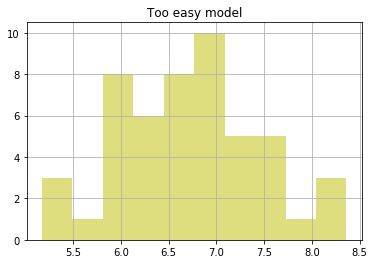

In [135]:
plt.title("Too easy model")
plt.hist(scores_easy, bins=10, color='y', alpha = 0.5)
plt.grid()
plt.show()

In [136]:
print(f"Mean = {np.mean(scores_easy)}, std = {np.std(scores_easy)}, dispersion = {np.std(scores_easy) ** 2}")

Mean = 6.726637119477881, std = 0.7114325061119445, dispersion = 0.506136210752722


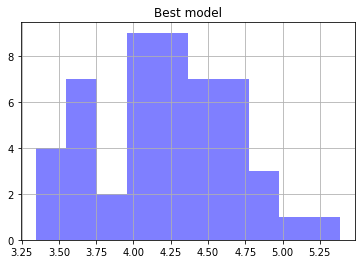

In [137]:
plt.title("Best model")
plt.hist(scores_best, bins=10, color='b', alpha = 0.5)
plt.grid()
plt.show()

In [138]:
print(f"Mean = {np.mean(scores_best)}, std = {np.std(scores_best)}, dispersion = {np.std(scores_best) ** 2}")

Mean = 4.2026618890263014, std = 0.4654978178360315, dispersion = 0.21668821841010716


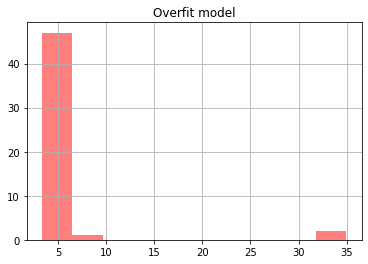

In [139]:
plt.title("Overfit model")
plt.hist(scores_overfit, bins=10, color='r', alpha = 0.5)
plt.grid()
plt.show()

In [140]:
print(f"Mean = {np.mean(scores_overfit)}, std = {np.std(scores_overfit)}, dispersion = {np.std(scores_overfit) ** 2}")

Mean = 5.610456893079666, std = 5.9177882309981324, dispersion = 35.02021754694


#### Построить графики зависимости средней и с.к.о. (по фолдам) среднеквадратичной ошибки (MSE) k-fold кросс-валидации на обучающей и тестовой выборках от числа фолдов k для нескольких фиксированных m

In [141]:
def MSE_kfold(m: int, k:int, X: np.array, y: np.array)->(float, float):
    poly = PolynomialFeatures(degree=m, include_bias=False)
    model = LinearRegression()
    new_X = poly.fit_transform(X.reshape(-1, 1))
    cv = KFold(n_splits=k, random_state=1, shuffle=True)
    scores = cross_val_score(model, new_X, y, scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    scores = [-item for item in scores]
    return np.mean(scores), np.std(scores)

In [142]:
m_kfolds_list = np.arange(1, 30)
k_kfolds_list = np.arange(2, 11, 2)

mean_loss_kfolds_list = []
std_loss_kfolds_list = []

for _ in k_kfolds_list:
    mean_loss_kfolds_list.append([])
    std_loss_kfolds_list.append([])

for k in k_kfolds_list:
    for m in m_kfolds_list:
        mean, std = MSE_kfold(m, k, X, y)
        mean_loss_kfolds_list[k//2-1].append(mean)
        std_loss_kfolds_list[k//2-1].append(std)
        
mean_loss_kfolds_list = np.array(mean_loss_kfolds_list)
std_loss_kfolds_list = np.array(std_loss_kfolds_list)

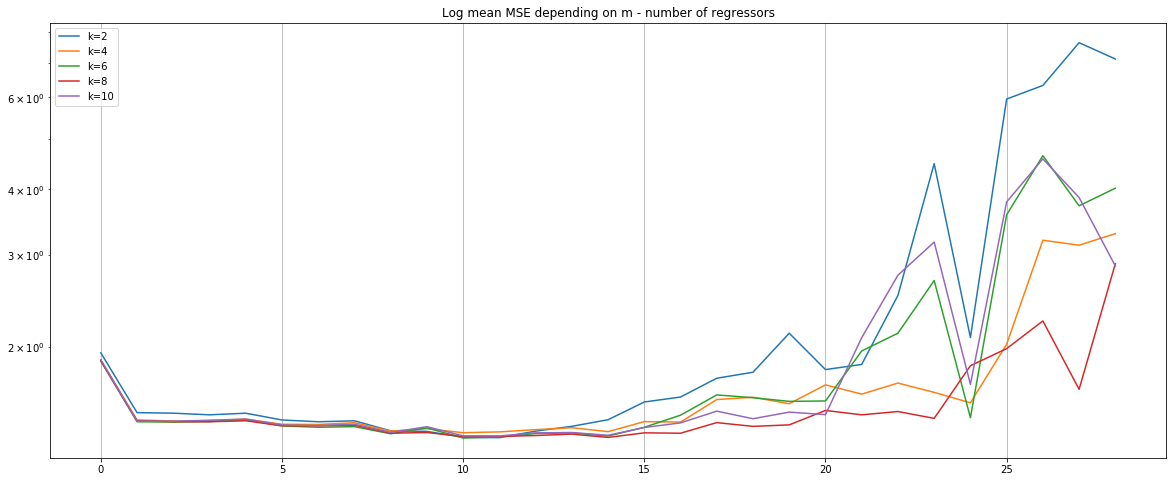

In [143]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Log mean MSE depending on m - number of regressors')
for k in k_kfolds_list:
    ax.semilogy(np.log(mean_loss_kfolds_list[k//2-1]), label=f'k={k}')
ax.legend()
ax.grid()
plt.show()

C:\Users\iverendeev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


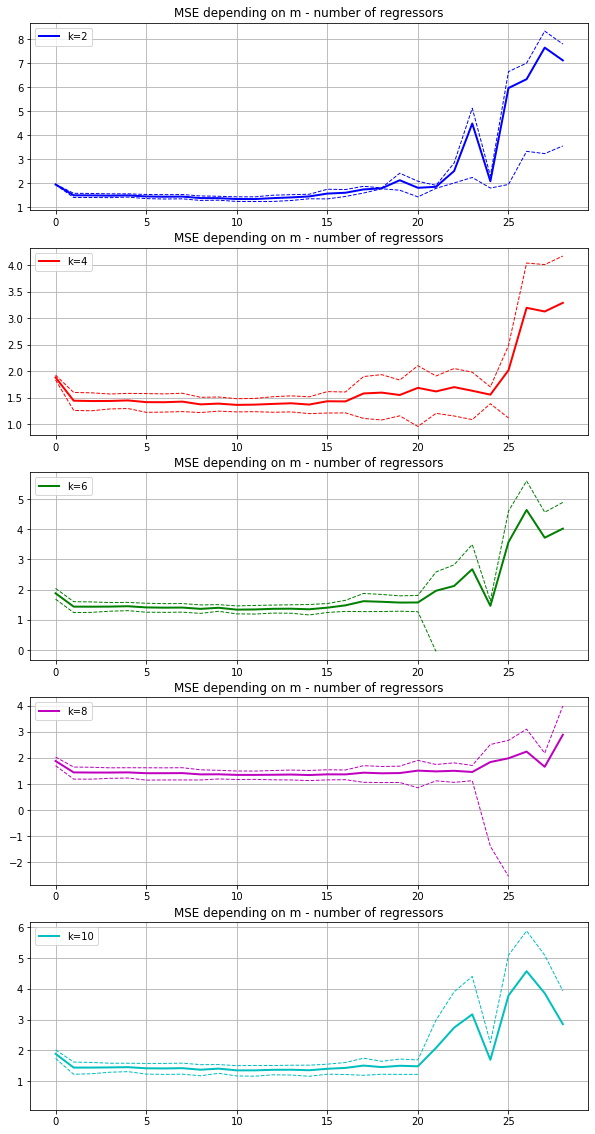

In [144]:
fig, axs = plt.subplots(len(k_kfolds_list), 
                               1, figsize=(10, 4*len(k_kfolds_list)))

colors = ['b', 'r', 'g', 'm', 'c']
for i in range(len(axs)):
    axs[i].set_title('MSE depending on m - number of regressors')
    axs[i].plot(np.log(mean_loss_kfolds_list[k_kfolds_list[i]//2-1]), f'{colors[i]}', linewidth=2, label=f'k={k_kfolds_list[i]}')
    axs[i].plot(np.log(mean_loss_kfolds_list[k_kfolds_list[i]//2-1] \
                - std_loss_kfolds_list[k_kfolds_list[i]//2-1]), f'{colors[i]}--', linewidth=1)
    axs[i].plot(np.log(mean_loss_kfolds_list[k_kfolds_list[i]//2-1] \
                + std_loss_kfolds_list[k_kfolds_list[i]//2-1]), f'{colors[i]}--', linewidth=1)
    axs[i].legend()
    axs[i].grid()
plt.show()

#### Построить графики зависимости средней и с.к.о. (по фолдам) среднеквадратичной ошибки (MSE) LOO-кросс-валидации на обучающей и тестовой выборках от объёма обучающей выборки для нескольких фиксированных m

In [145]:
def MSE_loo(m: int, size:int, X: np.array, y: np.array)->(float, float):
    poly = PolynomialFeatures(degree=m, include_bias=False)
    model = LinearRegression()
    new_X = poly.fit_transform(X.reshape(-1, 1))
    idx = np.random.randint(new_X.shape[0], size=size*new_X.shape[0]//100)
    new_X = new_X[idx, :]
    new_y = y[idx]
    cv = LeaveOneOut()
    scores = cross_val_score(model, new_X, new_y, scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    scores = [-item for item in scores]
    return np.mean(scores), np.std(scores)

In [146]:
m_loo_list = np.arange(1, 30)
size_loo_list = np.arange(10, 100, 20)

mean_loss_loo_list = []
std_loss_loo_list = []

for _ in size_loo_list:
    mean_loss_loo_list.append([])
    std_loss_loo_list.append([])

for size in size_loo_list:
    for m in m_loo_list:
        mean, std = MSE_loo(m, k, X, y)
        mean_loss_loo_list[size//20-1].append(mean)
        std_loss_loo_list[size//20-1].append(std)
        
mean_loss_loo_list = np.array(mean_loss_loo_list)
std_loss_loo_list = np.array(std_loss_loo_list)

In [147]:
np.log(mean_loss_loo_list[0]), np.log(mean_loss_loo_list[0]+std_loss_loo_list[0])

(array([ 1.82628323,  1.74062221,  1.31549141,  1.59858059,  1.61198908,
         2.47215821,  2.49718908,  3.36153411,  3.16440255,  4.41269078,
         2.36071509,  1.78700061, 10.37997605, 13.09930697,  8.47277072,
        16.64287999, 19.82048975, 15.27647106, 10.78249334, 14.32443024,
        24.57736377, 19.98519328, 22.69418656, 25.05623125, 25.50312094,
        38.31046688, 39.03841933, 32.93053455, 28.5446994 ]),
 array([ 2.6647477 ,  2.5253416 ,  2.13860878,  2.55501144,  2.66339413,
         3.86697369,  3.94013188,  5.01389073,  4.78994634,  6.14752497,
         3.07245912,  2.8894133 , 12.23363419, 14.62450943, 10.32328905,
        18.46779444, 21.6743848 , 17.11114844, 12.63527615, 15.65728326,
        26.40137739, 21.7926007 , 24.3844627 , 26.84879357, 27.35295434,
        40.16439055, 40.89220513, 34.58394576, 30.39841524]))

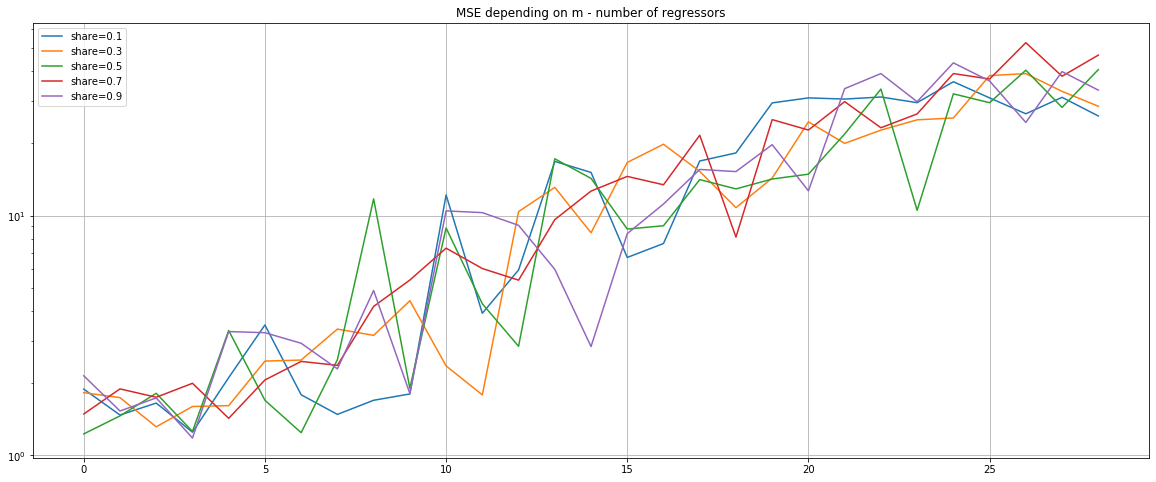

In [148]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('MSE depending on m - number of regressors')
for size in size_loo_list:
    ax.semilogy(np.log(mean_loss_loo_list[size//20-1]), label=f'share={size/100}')
ax.legend()
ax.grid()
plt.show()

C:\Users\iverendeev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


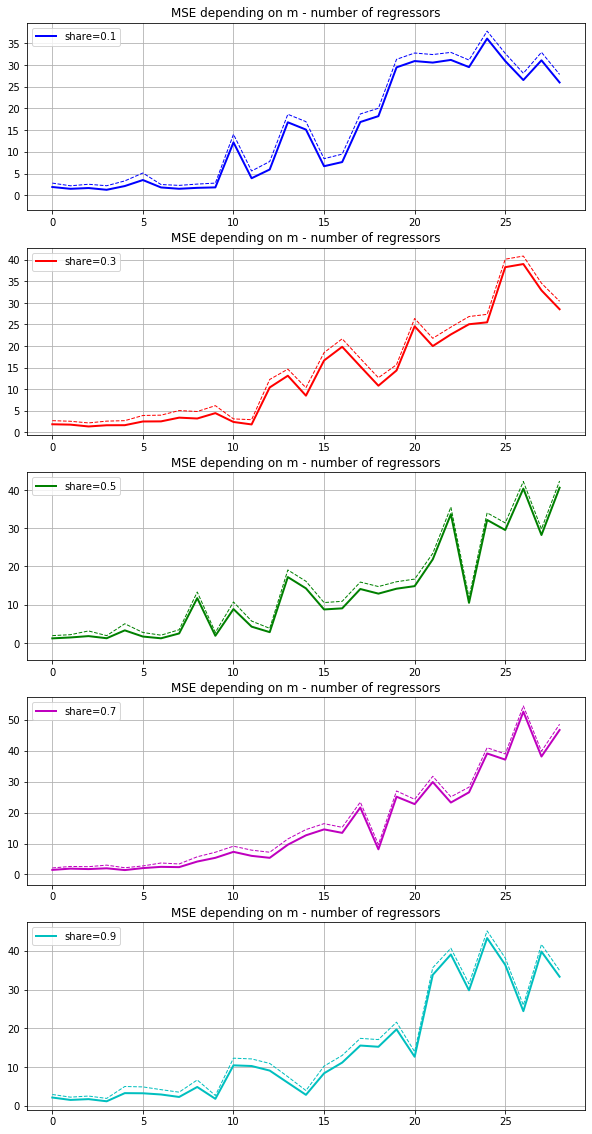

In [149]:
fig, axs = plt.subplots(len(k_kfolds_list), 
                               1, figsize=(10, 4*len(k_kfolds_list)))

colors = ['b', 'r', 'g', 'm', 'c']
for i in range(len(axs)):
    axs[i].set_title('MSE depending on m - number of regressors')
    axs[i].plot(np.log(mean_loss_loo_list[size_loo_list[i]//20-1]), f'{colors[i]}', linewidth=2, label=f'share={size_loo_list[i]/100}')
    axs[i].plot(np.log(mean_loss_loo_list[size_loo_list[i]//20-1] \
                - std_loss_loo_list[size_loo_list[i]//20-1]), f'{colors[i]}--', linewidth=1)
    axs[i].plot(np.log(mean_loss_loo_list[size_loo_list[i]//20-1] \
                + std_loss_loo_list[size_loo_list[i]//20-1]), f'{colors[i]}--', linewidth=1)
    axs[i].legend()
    axs[i].grid()
plt.show()